In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
df = pd.read_csv("city_day.csv")

In [55]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [57]:
df.isnull().sum()
# df.shape


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

# fill nullvalue replaced by mean 

In [58]:
df["Xylene"] = df["Xylene"].fillna(df["Xylene"].mean())
df["Toluene"] = df["Toluene"].fillna(df["Toluene"].mean())
df["Benzene"] = df["Benzene"].fillna(df["Benzene"].mean())
df["NH3"] = df["NH3"].fillna(df["NH3"].mean())
df["PM10"] = df["PM10"].fillna(df["PM10"].mean())
df["PM2.5"] = df["PM2.5"].fillna(df["PM2.5"].mean())




In [59]:
df = df.dropna(subset=["NOx","NO","SO2","CO","NO2","O3","AQI"])


In [60]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02000,0.000000,3.140000,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04000,0.000000,4.810000,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24000,0.010000,7.670000,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40000,0.040000,25.870000,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46000,0.060000,35.610000,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.0,Satisfactory


In [61]:
df.shape

(21704, 16)

In [62]:
df["City"].values

array(['Ahmedabad', 'Ahmedabad', 'Ahmedabad', ..., 'Visakhapatnam',
       'Visakhapatnam', 'Visakhapatnam'], dtype=object)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21704 entries, 28 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        21704 non-null  object 
 1   Date        21704 non-null  object 
 2   PM2.5       21704 non-null  float64
 3   PM10        21704 non-null  float64
 4   NO          21704 non-null  float64
 5   NO2         21704 non-null  float64
 6   NOx         21704 non-null  float64
 7   NH3         21704 non-null  float64
 8   CO          21704 non-null  float64
 9   SO2         21704 non-null  float64
 10  O3          21704 non-null  float64
 11  Benzene     21704 non-null  float64
 12  Toluene     21704 non-null  float64
 13  Xylene      21704 non-null  float64
 14  AQI         21704 non-null  float64
 15  AQI_Bucket  21704 non-null  object 
dtypes: float64(13), object(3)
memory usage: 2.8+ MB


# feacture engineering

In [64]:
# df["Date"] = pd.to_datetime(df["Date"])

# df["year"] = df["Date"].dt.year
# df["month"] = df["Date"].dt.month
# df["day"] = df["Date"].dt.day
# df["day_of_week"] = df["Date"].dt.dayofweek

df = df.copy()

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df.loc[:, "year"] = df["Date"].dt.year
df.loc[:, "month"] = df["Date"].dt.month
df.loc[:, "day"] = df["Date"].dt.day
df.loc[:, "day_of_week"] = df["Date"].dt.dayofweek


In [65]:
# Season Feature banaya 
# 1. Winter me pollution high hota hai isliye usko fetch kerke alag colom bana diya h 

In [66]:
def get_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Summer"
    elif month in [6,7,8,9]:
        return "Monsoon"
    else:
        return "Post-Monsoon"

df["Season"] = df["month"].apply(get_season)


In [67]:
df["PM_ratio"] = df["PM2.5"] / (df["PM10"] + 1)


In [68]:
# df.corr()
df.corr(numeric_only=True)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,year,month,day,day_of_week,PM_ratio
PM2.5,1.000000,0.630474,0.517001,0.413206,0.463793,0.213265,0.094690,0.148149,0.183357,0.021943,0.107454,0.072982,0.665944,-0.227483,0.045191,-0.008927,-0.004837,0.233135
PM10,0.630474,1.000000,0.508423,0.428464,0.491198,0.262306,0.052648,0.153988,0.244569,0.016531,0.130776,0.029754,0.512344,-0.180475,-0.009400,-0.018983,-0.007600,-0.045968
NO,0.517001,0.508423,1.000000,0.492341,0.810986,0.149556,0.215229,0.208967,0.018725,0.039045,0.143124,0.070516,0.482697,-0.044989,0.044145,-0.009341,-0.007865,0.172318
NO2,0.413206,0.428464,0.492341,1.000000,0.641432,0.147669,0.370236,0.488954,0.310795,0.025357,0.265882,0.150557,0.570253,-0.079223,0.024245,-0.008883,-0.014142,0.036999
NOx,0.463793,0.491198,0.810986,0.641432,1.000000,0.131532,0.241695,0.260834,0.100240,0.043344,0.185006,0.074004,0.493237,-0.012940,0.020881,-0.009735,-0.010396,0.092751
NH3,0.213265,0.262306,0.149556,0.147669,0.131532,1.000000,0.016405,0.003217,0.076295,-0.013516,0.001680,0.002438,0.149260,-0.205830,0.018166,0.003633,-0.005223,0.020264
CO,0.094690,0.052648,0.215229,0.370236,0.241695,0.016405,1.000000,0.546402,0.042521,0.046475,0.267552,0.166755,0.686545,-0.085258,0.006734,0.002235,-0.000280,0.025028
SO2,0.148149,0.153988,0.208967,0.488954,0.260834,0.003217,0.546402,1.000000,0.195245,0.035320,0.299222,0.248348,0.525117,0.038583,-0.005310,0.002423,0.001812,0.022804
O3,0.183357,0.244569,0.018725,0.310795,0.100240,0.076295,0.042521,0.195245,1.000000,0.017901,0.120173,0.092719,0.204412,-0.059603,-0.076495,-0.009990,0.002577,-0.012549
Benzene,0.021943,0.016531,0.039045,0.025357,0.043344,-0.013516,0.046475,0.035320,0.017901,1.000000,0.722500,0.087613,0.043596,0.040979,-0.010505,-0.004339,0.000444,0.005990


# Rolling Average

In [69]:
df["PM2.5_rolling"] = df["PM2.5"].rolling(window=3).mean()


In [70]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,AQI_Bucket,year,month,day,day_of_week,Season,PM_ratio,PM2.5_rolling
28,Ahmedabad,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,...,3.140000,209.0,Poor,2015,1,29,3,Winter,0.697826,NaN
29,Ahmedabad,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,...,4.810000,328.0,Very Poor,2015,1,30,4,Winter,0.670209,NaN
30,Ahmedabad,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,...,7.670000,514.0,Severe,2015,1,31,5,Winter,0.793438,85.830000
31,Ahmedabad,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,...,25.870000,782.0,Severe,2015,2,1,6,Winter,1.141554,103.450000
32,Ahmedabad,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,...,35.610000,914.0,Severe,2015,2,2,0,Winter,1.496973,136.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,...,0.730000,41.0,Good,2020,6,27,5,Monsoon,0.289180,12.033333
29527,Visakhapatnam,2020-06-28,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,...,0.380000,70.0,Satisfactory,2020,6,28,6,Monsoon,0.324677,15.676667
29528,Visakhapatnam,2020-06-29,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,...,0.000000,68.0,Satisfactory,2020,6,29,0,Monsoon,0.343324,20.770000
29529,Visakhapatnam,2020-06-30,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,...,0.000000,54.0,Satisfactory,2020,6,30,1,Monsoon,0.326467,21.310000


# EDA(Exploratory Data Analysis)

In [71]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket       0
year             0
month            0
day              0
day_of_week      0
Season           0
PM_ratio         0
PM2.5_rolling    2
dtype: int64

In [72]:
df.shape

(21704, 23)

In [73]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,year,month,day,day_of_week,PM_ratio,PM2.5_rolling
count,21704,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21704.000000,21702.000000
mean,2018-07-29 11:33:19.705123328,66.490206,118.001926,17.920361,29.934599,32.788049,24.559453,2.368922,14.060786,35.261689,3.566226,9.570925,3.204284,166.087956,2018.093024,6.311417,15.766449,2.999862,0.594464,66.491837
min,2015-01-01 00:00:00,0.160000,0.180000,0.030000,0.010000,0.000000,0.020000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,14.000000,2015.000000,1.000000,1.000000,0.000000,0.025408,0.226667
25%,2017-10-13 00:00:00,28.820000,70.387500,5.510000,12.950000,13.650000,11.897500,0.620000,5.890000,19.880000,0.350000,1.530000,2.160000,80.000000,2017.000000,3.000000,8.000000,1.000000,0.366326,30.077500
50%,2018-11-27 00:00:00,48.705000,118.127103,10.060000,23.350000,23.920000,23.483476,0.940000,9.360000,31.885000,1.700000,6.360000,3.070128,117.000000,2018.000000,6.000000,16.000000,3.000000,0.476790,49.533333
75%,2019-10-15 00:00:00,79.772500,122.965000,20.180000,39.382500,40.750000,26.510000,1.470000,14.830000,46.382500,3.280840,8.700972,3.070128,207.000000,2019.000000,9.000000,23.000000,5.000000,0.608181,80.075833
max,2020-07-01 00:00:00,914.940000,847.410000,287.140000,277.310000,293.100000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,1917.000000,2020.000000,12.000000,31.000000,6.000000,65.336066,587.440000
std,NaN,60.865597,75.554189,22.819578,24.691333,30.873716,23.107064,7.070130,16.838655,21.362354,15.804608,19.267902,4.068051,140.764483,1.505633,3.474740,8.838616,1.992996,1.224397,57.583686


# AQI Distribution (Target Analysis)

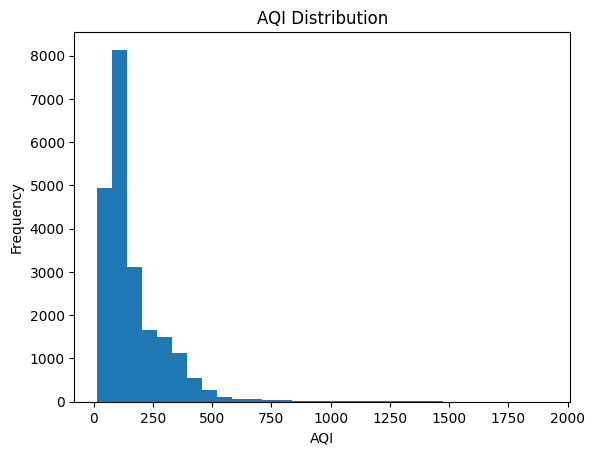

In [23]:
%matplotlib inline



plt.hist(df["AQI"], bins=30)
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.title("AQI Distribution")
plt.show()



# Correlation Heatmap

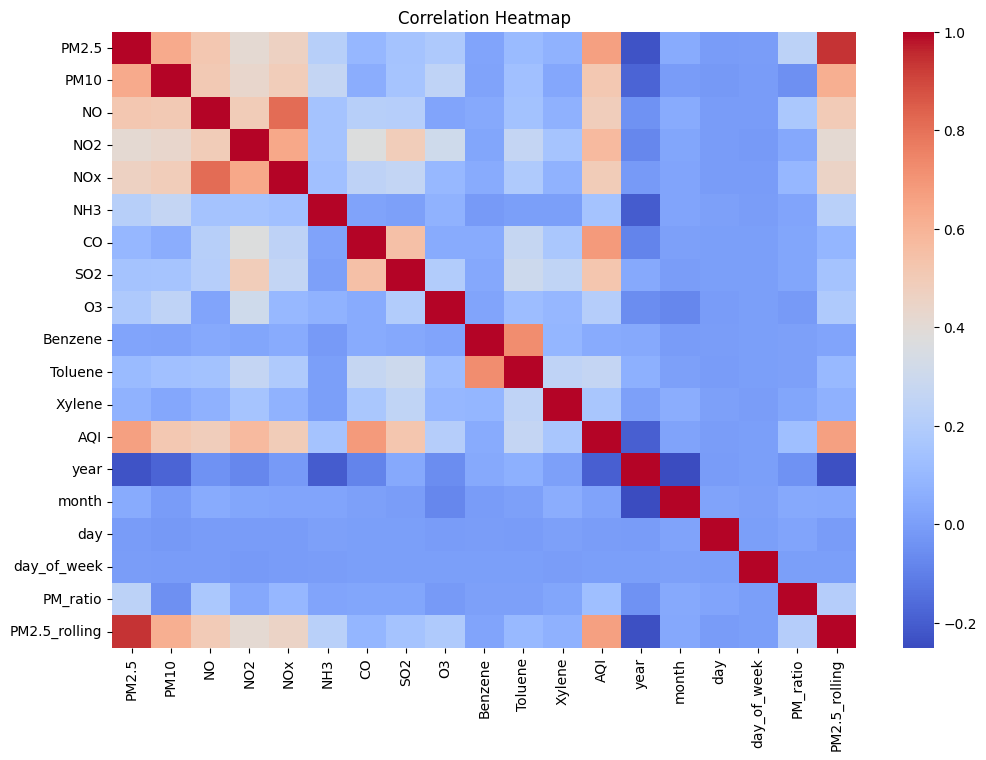

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# AQI vs PM2.5 (Relationship Check)

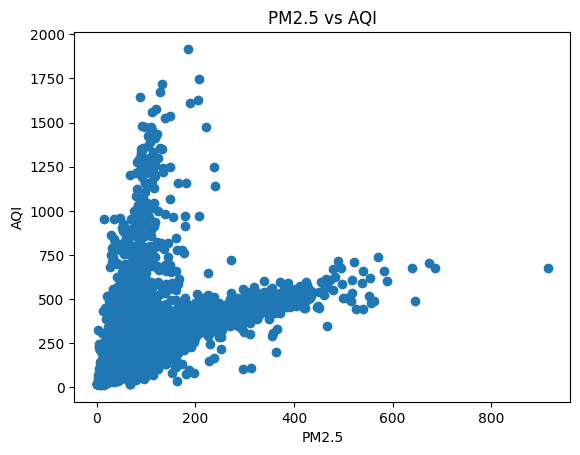

In [25]:
plt.scatter(df["PM2.5"], df["AQI"])
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.title("PM2.5 vs AQI")
plt.show()


# Seasonal Trend (Agar Season column hai)

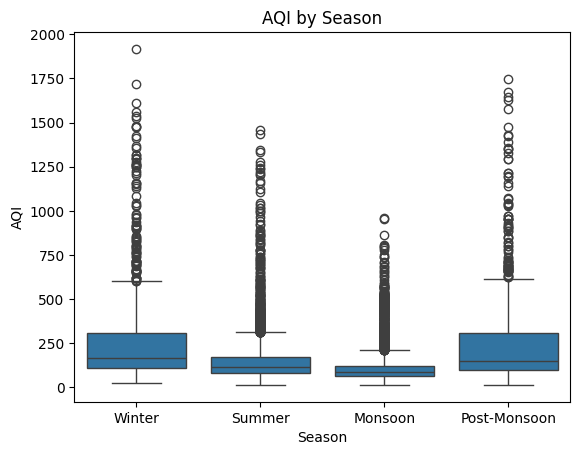

In [26]:
sns.boxplot(x="Season", y="AQI", data=df)
plt.title("AQI by Season")
plt.show()

# City-wise AQI Comparison

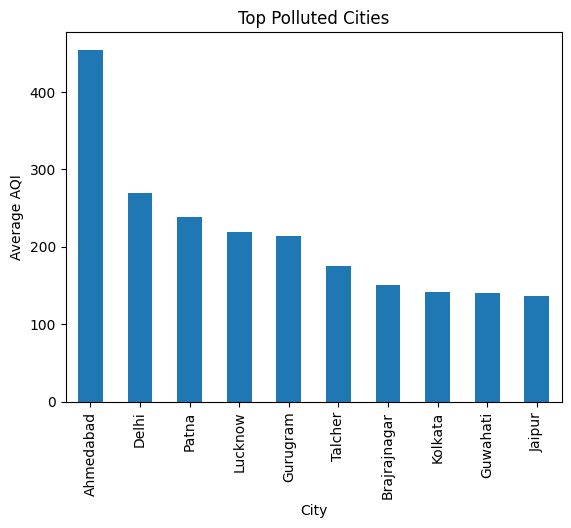

In [27]:
city_avg = df.groupby("City")["AQI"].mean().sort_values(ascending=False)

city_avg.head(10).plot(kind="bar")
plt.title("Top Polluted Cities")
plt.ylabel("Average AQI")
plt.show()


In [28]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 33.54it/s]
C:\Users\Nitin\miniconda3\envs\myenv\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 9 9 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\Nitin\miniconda3\envs\myenv\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 4 4 5]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\Nitin\miniconda3\envs\myenv\Lib\site-packages\ydata_profiling\model\pandas\discretize_

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
df["City"].values


array(['Ahmedabad', 'Ahmedabad', 'Ahmedabad', ..., 'Visakhapatnam',
       'Visakhapatnam', 'Visakhapatnam'], dtype=object)

In [25]:
df.reset_index()

,index,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,Xylene,AQI,AQI_Bucket,year,month,day,day_of_week,Season,PM_ratio,PM2.5_rolling
0,28,Ahmedabad,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,...,3.140000,209.0,Poor,2015,1,29,3,Winter,0.697826,NaN
1,29,Ahmedabad,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,...,4.810000,328.0,Very Poor,2015,1,30,4,Winter,0.670209,NaN
2,30,Ahmedabad,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,...,7.670000,514.0,Severe,2015,1,31,5,Winter,0.793438,85.830000
3,31,Ahmedabad,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,...,25.870000,782.0,Severe,2015,2,1,6,Winter,1.141554,103.450000
4,32,Ahmedabad,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,...,35.610000,914.0,Severe,2015,2,2,0,Winter,1.496973,136.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21699,29526,Visakhapatnam,2020-06-27,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,...,0.730000,41.0,Good,2020,6,27,5,Monsoon,0.289180,12.033333
21700,29527,Visakhapatnam,2020-06-28,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,...,0.380000,70.0,Satisfactory,2020,6,28,6,Monsoon,0.324677,15.676667
21701,29528,Visakhapatnam,2020-06-29,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,...,0.000000,68.0,Satisfactory,2020,6,29,0,Monsoon,0.343324,20.770000
21702,29529,Visakhapatnam,2020-06-30,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,...,0.000000,54.0,Satisfactory,2020,6,30,1,Monsoon,0.326467,21.310000


In [31]:
df.to_csv("update_aqi.csv")

# select one city
prophet ek timme series pe kaam karta hai to pehle ek city filter karta hain

In [39]:
pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.1 MB 846.2 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/12.1 MB 1.0 MB/s eta 0:00:12
   -- ------------------------------------- 0.8/12.1 MB 1.0 MB/s eta 0:00:12
   --- ------------------------------------ 1.0/12.1 MB 958.4 kB/s eta 0:00:12
   --- ------------------------------------ 1.0/12.1 MB 958.4 kB/s eta 0:00:12
   ---- ----------------------------------- 1.3/12.1 MB 775.8 kB/s eta 0:00:14
   ----- ---------------------------------- 1.6/12.1 MB 809.1 kB/s eta 0:00:14
   ------ --------------------------------- 1.8/12.1 MB 806.1 kB/s eta 0:00:13
   ------ --------------------------------- 1.8/12.1 MB 806.1 kB/s eta 0:00:13
   ------ --------------------------------- 1.8/12.1 MB 806.1 kB/s eta 0:00:13
   -

In [74]:
city_df = df[df["City"] == "Ahmedabad"].copy()

# according prophet formet fetch two column only

#### ds -> data
#### y -> target

In [75]:
city_df = city_df[["Date", "AQI"]]
city_df = city_df.rename(columns ={
    "Date": "ds"
    ,"AQI" : "y"
})


# date formet insure

In [76]:
city_df["ds"] = pd.to_datetime(city_df["ds"])

## remove null AQI VALUES

In [77]:
city_df = city_df.dropna()

# prophet model train

In [78]:
from prophet import Prophet
model = Prophet()

model.fit(city_df)

22:27:07 - cmdstanpy - INFO - Chain [1] start processing
22:27:07 - cmdstanpy - INFO - Chain [1] done processing


# future Dates generate or predict

In [89]:
future = model.make_future_dataframe(periods=30)

# forcasting

In [90]:
forecast = model.predict(future)

# forcast graph

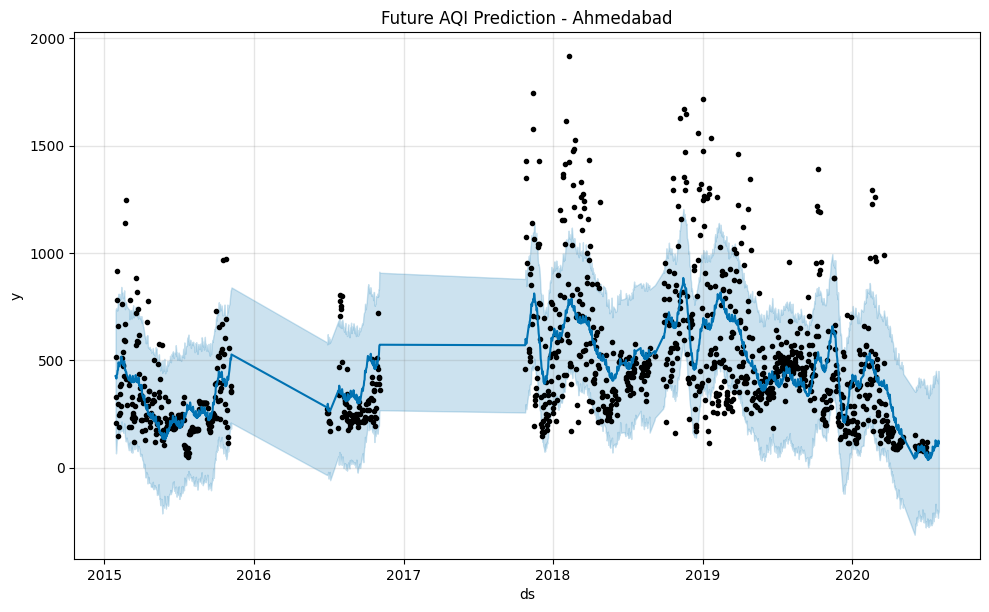

In [91]:
model.plot(forecast)
plt.title("Future AQI Prediction - Ahmedabad")
plt.show()

# Trend & Seasonality

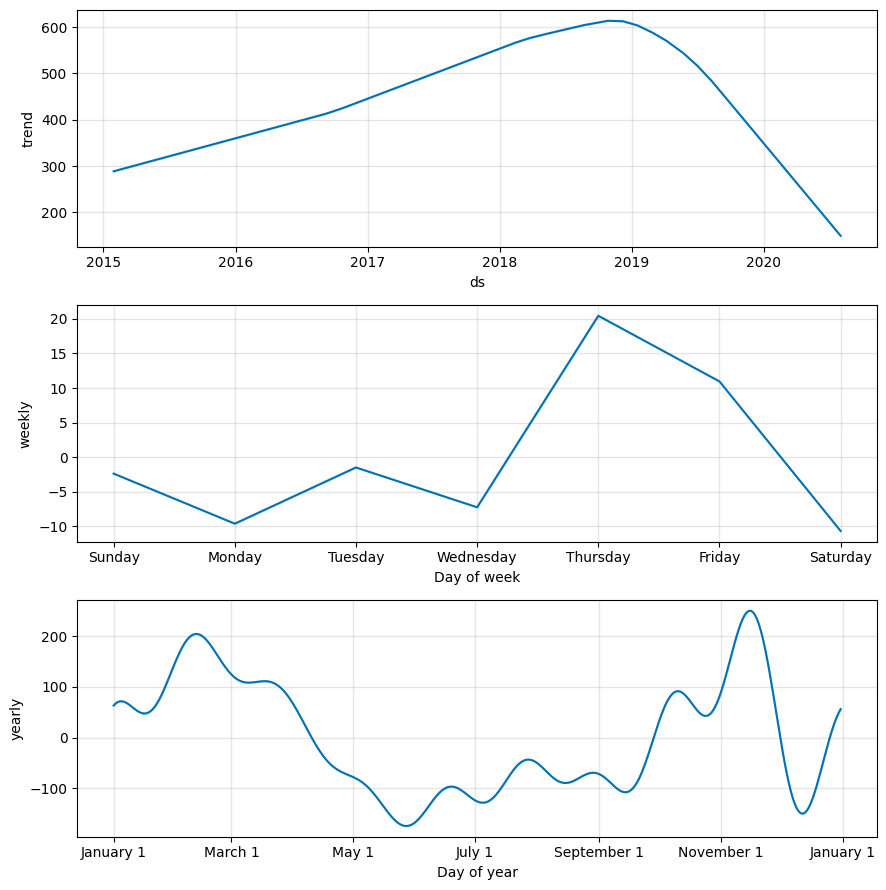

In [92]:
model.plot_components(forecast)
plt.show()

# but i want only see after 7 day result

In [95]:
forecast[["ds", "yhat"]].tail(7)

,ds,yhat
1234,2020-07-25,99.104140
1235,2020-07-26,107.930672
1236,2020-07-27,100.431776
1237,2020-07-28,107.532700
1238,2020-07-29,100.003804
1239,2020-07-30,125.237560
1240,2020-07-31,112.644850
